In [19]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [4]:
names1880 = pd.read_csv('yob1880.txt', names=['name', 'sex', 'births'])
names1880[:5]

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [5]:
# 1880年の性別出生数
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [12]:
# 全txt読み込み
years = range(1880,2011)
pieces = []
# 列は名前、性別、出生数
columns = ['name', 'sex', 'births']
for year in years:
    path = 'yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)
    
# 配列piecesを一つのデータフレームにまとめる
names = pd.concat(pieces, ignore_index=True)
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [14]:
# 年度別男女出生数
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)

In [16]:
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


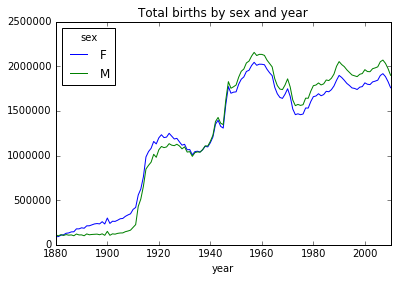

In [21]:
total_births.plot(title='Total births by sex and year')

In [22]:
# prop追加 ある名前の数/出生数で名前の珍しさの指標とする
def add_prop(group):
    births = group.births.astype(float)
    group['prop'] = births / births.sum()
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [25]:
# ある年、ある性別のpropの和が1であること
np.allclose(names.groupby(['year','sex']).prop.sum(),1)

True

In [33]:
# 上位1000を取得する
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
# 年代、性別ごとのグループ
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
top1000

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
         5         Margaret   F    1578  1880  0.017342
         6              Ida   F    1472  1880  0.016177
         7            Alice   F    1414  1880  0.015540
         8           Bertha   F    1320  1880  0.014507
         9            Sarah   F    1288  1880  0.014155
         10           Annie   F    1258  1880  0.013825
         11           Clara   F    1226  1880  0.013474
         12            Ella   F    1156  1880  0.012704
         13        Florence   F    1063  1880  0.011682
         14            Cora   F    1045  1880  0.011484
         15          Martha   F    1040  1880  0.011429
         16           Laura   F    1012  1880  0.011122
         17          Nellie   F     995  1880  0.010935
         18           Grace   F     982  1880  0.010792
         19          Carrie   F     949  1880  0.010429
         20           Maude   F     858  1880  0.009429
         21           Mabel   F     808  1880  0.008880
         22          Bessie   F     794  1880  0.008726
         23          Jennie   F     793  1880  0.008715
         24        Gertrude   F     787  1880  0.008649
         25           Julia   F     783  1880  0.008605
         26          Hattie   F     769  1880  0.008451
         27           Edith   F     768  1880  0.008440
         28          Mattie   F     704  1880  0.007737
         29            Rose   F     700  1880  0.007693
...                     ...  ..     ...   ...       ...
2010 M   1677617       Yair   M     201  2010  0.000106
         1677616      Talan   M     201  2010  0.000106
         1677614      Keyon   M     201  2010  0.000106
         1677613       Kael   M     201  2010  0.000106
         1677618   Demarion   M     200  2010  0.000105
         1677619     Gibson   M     200  2010  0.000105
         1677620     Reagan   M     200  2010  0.000105
         1677621  Cristofer   M     199  2010  0.000105
         1677622     Daylen   M     199  2010  0.000105
         1677623     Jordon   M     199  2010  0.000105
         1677624    Dashawn   M     198  2010  0.000104
         1677625      Masen   M     198  2010  0.000104
         1677629      Rowen   M     197  2010  0.000104
         1677631     Yousef   M     197  2010  0.000104
         1677630   Thaddeus   M     197  2010  0.000104
         1677628      Kadin   M     197  2010  0.000104
         1677627     Dillan   M     197  2010  0.000104
         1677626   Clarence   M     197  2010  0.000104
         1677634      Slade   M     196  2010  0.000103
         1677632    Clinton   M     196  2010  0.000103
         1677633    Sheldon   M     196  2010  0.000103
         1677636    Keshawn   M     195  2010  0.000103
         1677637   Menachem   M     195  2010  0.000103
         1677635     Joziah   M     195  2010  0.000103
         1677638     Bailey   M     194  2010  0.000102
         1677639     Camilo   M     194  2010  0.000102
         1677640     Destin   M     194  2010  0.000102
         1677641     Jaquan   M     194  2010  0.000102
         1677642     Jaydan   M     194  2010  0.000102
         1677645     Maxton   M     193  2010  0.000102

[261877 rows x 5 columns]

## 2.3.1 名付けの傾向分析

In [34]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']
boys

name sex  births  year      prop
year sex                                               
1880 M   942           John   M    9655  1880  0.087381
         943        William   M    9533  1880  0.086277
         944          James   M    5927  1880  0.053641
         945        Charles   M    5348  1880  0.048401
         946         George   M    5126  1880  0.046392
         947          Frank   M    3242  1880  0.029341
         948         Joseph   M    2632  1880  0.023821
         949         Thomas   M    2534  1880  0.022934
         950          Henry   M    2444  1880  0.022119
         951         Robert   M    2416  1880  0.021866
         952         Edward   M    2364  1880  0.021395
         953          Harry   M    2152  1880  0.019476
         954         Walter   M    1755  1880  0.015883
         955         Arthur   M    1599  1880  0.014472
         956           Fred   M    1569  1880  0.014200
         957         Albert   M    1493  1880  0.013512
         958         Samuel   M    1024  1880  0.009268
         959          David   M     869  1880  0.007865
         960          Louis   M     828  1880  0.007494
         961            Joe   M     731  1880  0.006616
         962        Charlie   M     730  1880  0.006607
         963       Clarence   M     730  1880  0.006607
         964        Richard   M     728  1880  0.006589
         965         Andrew   M     644  1880  0.005828
         966         Daniel   M     643  1880  0.005819
         967         Ernest   M     615  1880  0.005566
         968           Will   M     588  1880  0.005322
         969          Jesse   M     569  1880  0.005150
         970          Oscar   M     544  1880  0.004923
         971          Lewis   M     517  1880  0.004679
...                     ...  ..     ...   ...       ...
2010 M   1677617       Yair   M     201  2010  0.000106
         1677616      Talan   M     201  2010  0.000106
         1677614      Keyon   M     201  2010  0.000106
         1677613       Kael   M     201  2010  0.000106
         1677618   Demarion   M     200  2010  0.000105
         1677619     Gibson   M     200  2010  0.000105
         1677620     Reagan   M     200  2010  0.000105
         1677621  Cristofer   M     199  2010  0.000105
         1677622     Daylen   M     199  2010  0.000105
         1677623     Jordon   M     199  2010  0.000105
         1677624    Dashawn   M     198  2010  0.000104
         1677625      Masen   M     198  2010  0.000104
         1677629      Rowen   M     197  2010  0.000104
         1677631     Yousef   M     197  2010  0.000104
         1677630   Thaddeus   M     197  2010  0.000104
         1677628      Kadin   M     197  2010  0.000104
         1677627     Dillan   M     197  2010  0.000104
         1677626   Clarence   M     197  2010  0.000104
         1677634      Slade   M     196  2010  0.000103
         1677632    Clinton   M     196  2010  0.000103
         1677633    Sheldon   M     196  2010  0.000103
         1677636    Keshawn   M     195  2010  0.000103
         1677637   Menachem   M     195  2010  0.000103
         1677635     Joziah   M     195  2010  0.000103
         1677638     Bailey   M     194  2010  0.000102
         1677639     Camilo   M     194  2010  0.000102
         1677640     Destin   M     194  2010  0.000102
         1677641     Jaquan   M     194  2010  0.000102
         1677642     Jaydan   M     194  2010  0.000102
         1677645     Maxton   M     193  2010  0.000102

[130997 rows x 5 columns]

In [35]:
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)
total_births
# ある名前の出生数の年代ごとの推移

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102,NaN,NaN,NaN,NaN,NaN,71,...,8,23,NaN,NaN,7,NaN,8,28,27,NaN
1881,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,NaN,81,...,NaN,22,NaN,NaN,10,NaN,9,21,27,NaN
1882,NaN,NaN,NaN,85,NaN,NaN,NaN,NaN,NaN,80,...,8,25,NaN,NaN,9,NaN,17,32,21,NaN
1883,NaN,NaN,NaN,105,NaN,NaN,NaN,NaN,NaN,79,...,NaN,23,NaN,NaN,10,NaN,11,35,25,NaN
1884,NaN,NaN,NaN,97,NaN,NaN,NaN,NaN,NaN,98,...,13,31,NaN,NaN,14,6,8,58,27,NaN
1885,NaN,NaN,NaN,88,NaN,6,NaN,NaN,NaN,88,...,6,27,NaN,NaN,12,6,14,48,38,NaN
1886,NaN,NaN,NaN,86,NaN,NaN,NaN,NaN,NaN,84,...,13,25,NaN,NaN,8,NaN,20,52,43,NaN
1887,NaN,NaN,NaN,78,NaN,NaN,NaN,NaN,NaN,104,...,9,34,NaN,NaN,23,NaN,28,46,33,NaN
1888,NaN,NaN,NaN,90,NaN,NaN,NaN,NaN,NaN,137,...,11,42,NaN,NaN,23,7,30,42,45,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x14bec0358>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x144649f98>], dtype=object)

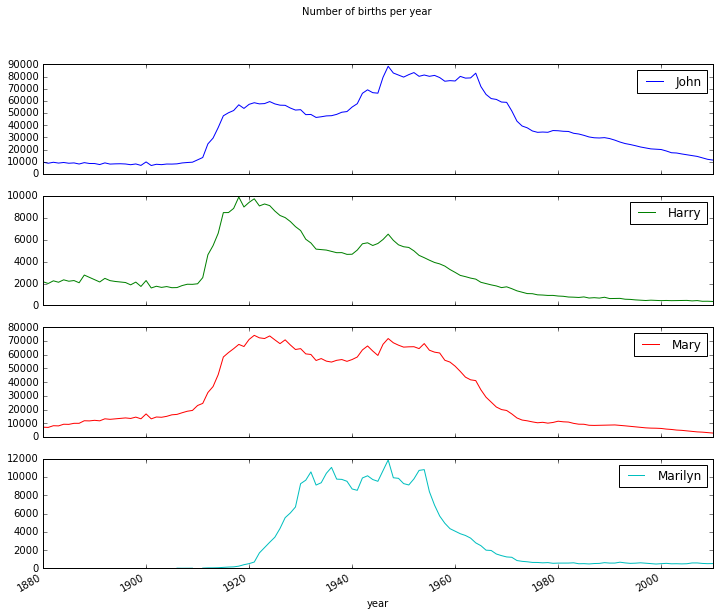

In [36]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12,10), grid=False, title='Number of births per year')

## 2.3.1.1多様化していく名付け

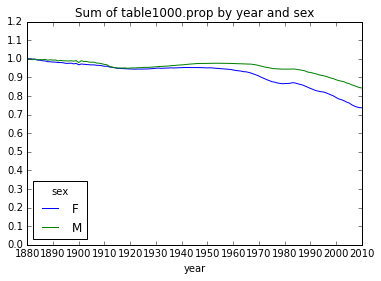

In [37]:
# 上位1000の名前が全体に占める割合を計算し、名前が多様化しているかどうかを検証する
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex',
          yticks=np.linspace(0,1.2,13), xticks=range(1880,2020,10))

近年名前の多様性が上がっている。特に女子の方がその傾向が顕著。

In [38]:
# 2010年生まれの男子の50%が何種類の名前で構成されているか
df = boys[boys.year == 2010]
df

name sex  births  year      prop
year sex                                                 
2010 M   1676644        Jacob   M   21875  2010  0.011523
         1676645        Ethan   M   17866  2010  0.009411
         1676646      Michael   M   17133  2010  0.009025
         1676647       Jayden   M   17030  2010  0.008971
         1676648      William   M   16870  2010  0.008887
         1676649    Alexander   M   16634  2010  0.008762
         1676650         Noah   M   16281  2010  0.008576
         1676651       Daniel   M   15679  2010  0.008259
         1676652        Aiden   M   15403  2010  0.008114
         1676653      Anthony   M   15364  2010  0.008093
         1676654       Joshua   M   15238  2010  0.008027
         1676655        Mason   M   14728  2010  0.007758
         1676656  Christopher   M   14135  2010  0.007446
         1676657       Andrew   M   14093  2010  0.007424
         1676658        David   M   14042  2010  0.007397
         1676659      Matthew   M   13954  2010  0.007350
         1676660        Logan   M   13943  2010  0.007345
         1676661       Elijah   M   13735  2010  0.007235
         1676662        James   M   13714  2010  0.007224
         1676663       Joseph   M   13657  2010  0.007194
         1676664      Gabriel   M   12722  2010  0.006701
         1676665     Benjamin   M   12280  2010  0.006469
         1676666         Ryan   M   11886  2010  0.006261
         1676667       Samuel   M   11776  2010  0.006203
         1676668      Jackson   M   11693  2010  0.006159
         1676669         John   M   11424  2010  0.006018
         1676670       Nathan   M   11269  2010  0.005936
         1676671     Jonathan   M   11028  2010  0.005809
         1676672    Christian   M   10965  2010  0.005776
         1676673         Liam   M   10852  2010  0.005716
...                       ...  ..     ...   ...       ...
         1677617         Yair   M     201  2010  0.000106
         1677616        Talan   M     201  2010  0.000106
         1677614        Keyon   M     201  2010  0.000106
         1677613         Kael   M     201  2010  0.000106
         1677618     Demarion   M     200  2010  0.000105
         1677619       Gibson   M     200  2010  0.000105
         1677620       Reagan   M     200  2010  0.000105
         1677621    Cristofer   M     199  2010  0.000105
         1677622       Daylen   M     199  2010  0.000105
         1677623       Jordon   M     199  2010  0.000105
         1677624      Dashawn   M     198  2010  0.000104
         1677625        Masen   M     198  2010  0.000104
         1677629        Rowen   M     197  2010  0.000104
         1677631       Yousef   M     197  2010  0.000104
         1677630     Thaddeus   M     197  2010  0.000104
         1677628        Kadin   M     197  2010  0.000104
         1677627       Dillan   M     197  2010  0.000104
         1677626     Clarence   M     197  2010  0.000104
         1677634        Slade   M     196  2010  0.000103
         1677632      Clinton   M     196  2010  0.000103
         1677633      Sheldon   M     196  2010  0.000103
         1677636      Keshawn   M     195  2010  0.000103
         1677637     Menachem   M     195  2010  0.000103
         1677635       Joziah   M     195  2010  0.000103
         1677638       Bailey   M     194  2010  0.000102
         1677639       Camilo   M     194  2010  0.000102
         1677640       Destin   M     194  2010  0.000102
         1677641       Jaquan   M     194  2010  0.000102
         1677642       Jaydan   M     194  2010  0.000102
         1677645       Maxton   M     193  2010  0.000102

[1000 rows x 5 columns]

In [40]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum[:10]

year  sex         
2010  M    1676644    0.011523
           1676645    0.020934
           1676646    0.029959
           1676647    0.038930
           1676648    0.047817
           1676649    0.056579
           1676650    0.065155
           1676651    0.073414
           1676652    0.081528
           1676653    0.089621
Name: prop, dtype: float64

In [41]:
# 50%になるインデックスは？
prop_cumsum.searchsorted(0.5)

array([116])

In [74]:
# 上位117番目で50%になる。続いて、1900は？
df = boys[boys.year == 1900]
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()
in1900.searchsorted(0.5)[0] + 1

24

In [75]:
# 25番目。年代別の推移を知りたい
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().searchsorted(q)[0] + 1
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack()
diversity[:10]

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16
1885,40,16
1886,41,16
1887,41,17
1888,42,17


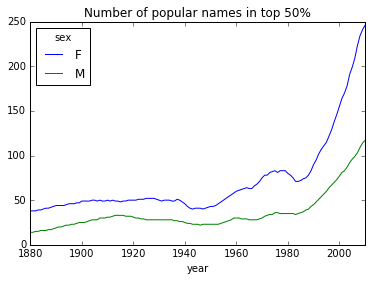

In [76]:
diversity.plot(title='Number of popular names in top 50%')

女子の方が常に多様性に富んでいる。また近年急速に多様性が拡大した。

## 2.3.1.2 名前「末尾一文字の変化」

男の子の名前の末尾の文字は過去100年で大幅に多様化したらしい

In [89]:
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

table = names.pivot_table('births', index=last_letters, columns=['sex','year'],aggfunc=sum)
table
# 名前の最後に登場する文字の年代・男女別の推移

sex              F                                                          \
year          1880   1881   1882   1883   1884   1885   1886   1887   1888   
last_letter                                                                  
a            31446  31581  36536  38330  43680  45408  49100  48942  59442   
b              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
c              NaN    NaN      5      5    NaN    NaN    NaN    NaN    NaN   
d              609    607    734    810    916    862   1007   1027   1298   
e            33378  34080  40399  41914  48089  49616  53884  54353  66750   
f              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
g                7      5     12      8     24     11     18     25     44   
h             4863   4784   5567   5701   6602   6624   7146   7141   8630   
i               61     78     81     76     84     92     85    105    141   
j              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
k               13     15     11     17     21     18     27     19     21   
l             2541   2911   3527   3848   4808   5144   5721   6175   7900   
m               58     57     81     86     79     75    103     90    123   
n             3008   2959   3576   3837   4507   4735   5242   5512   6833   
o               30     49     35     47     74     84     93     97    134   
p              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
q              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
r              481    417    590    640    718    799    917    910   1207   
s             1391   1316   1637   1794   2039   2127   2524   2803   3582   
t             2152   2165   2399   2554   2825   2889   3017   3140   3816   
u              380    427    410    444    490    495    511    476    541   
v              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
w              NaN      5    NaN    NaN    NaN    NaN      5    NaN    NaN   
x              NaN    NaN    NaN      7    NaN    NaN    NaN    NaN    NaN   
y            10469  10404  12145  12063  13917  13927  14936  14980  17931   
z              106     95    106    141    148    150    202    188    238   

sex                  ...         M                                          \
year          1889   ...      2001    2002    2003    2004    2005    2006   
last_letter          ...                                                     
a            58631   ...     39124   38815   37825   38650   36838   36156   
b              NaN   ...     50950   49284   48065   45914   43144   42600   
c              NaN   ...     27113   27238   27697   26778   26078   26635   
d             1374   ...     60838   55829   53391   51754   50670   51410   
e            66663   ...    145395  144651  144769  142098  141123  142999   
f              NaN   ...      1758    1817    1819    1904    1985    1968   
g               28   ...      2151    2084    2009    1837    1882    1929   
h             8826   ...     85959   88085   88226   89620   92497   98477   
i              134   ...     20980   23610   26011   28500   31317   33558   
j              NaN   ...      1069    1088    1203    1094    1291    1241   
k               22   ...     42477   42043   42296   41400   42151   42537   
l             8395   ...    153648  153493  153862  152800  155312  156234   
m              137   ...     41967   42663   42790   43054   41600   42503   
n             7103   ...    616099  630322  663419  676011  686326  720998   
o              142   ...     82146   83180   85423   88822   92001   96350   
p              NaN   ...      3419    3157    2982    2841    2768    2721   
q              NaN   ...       602     618     585     523     446     430   
r             1214   ...    165377  164821  169878  169452  172069  176490   
s             3569   ...    143791  139595  138632  139642  139913  143232   
t             3784   

In [102]:
# ある列を抽出
subtable = table.reindex(columns= [1910, 1960, 2010], level='year')
subtable.head()

sex               F                      M                
year           1910    1960    2010   1910    1960    2010
last_letter                                               
a            108376  691247  670605    977    5204   28438
b               NaN     694     450    411    3912   38859
c                 5      49     946    482   15476   23125
d              6750    3729    2607  22111  262112   44398
e            133569  435013  313833  28655  178823  129012

In [103]:
# 比率が知りたいので正規化する
letter_prop = subtable / subtable.sum().astype(float)

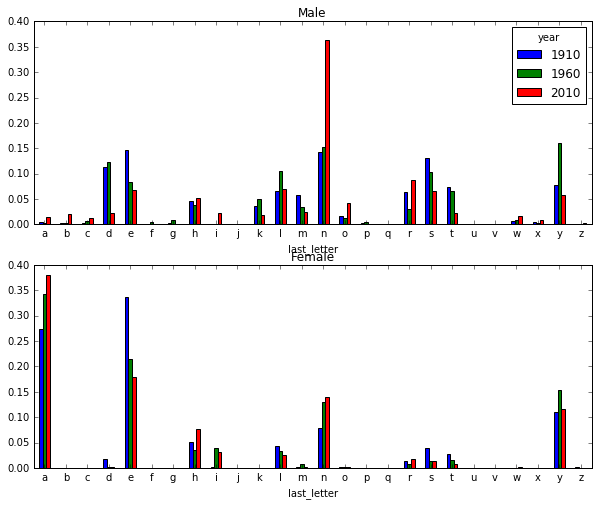

In [104]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1, figsize=(10,8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',legend=False)

In [108]:
# nで終わる名前が圧倒的に増えてる。つぎは男子のd,n,yの文字の年代別推移を見てみる
letter_prop = table / table.sum().astype(float)
dny_ts = letter_prop.ix[['d','n','y'],'M'].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


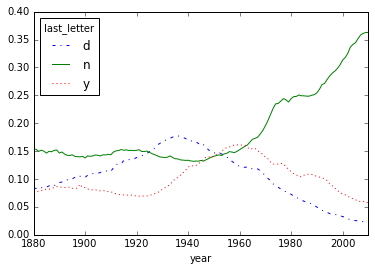

In [110]:
dny_ts.plot(style={'d':'-.','n':'-', 'y':':'})

# 2.3.1.3 男の子の名前として定着した女の子の名前

In [112]:
all_names = top1000.name.unique()
mask = np.array(['lesl' in x.lower() for x in all_names])
lesley_like = all_names[mask]
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [114]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [118]:
filtered.head()

name sex  births  year      prop
year sex                                         
1880 F   654   Leslie   F       8  1880  0.000088
     M   1108  Leslie   M      79  1880  0.000715
1881 F   2523  Leslie   F      11  1881  0.000120
     M   3072  Leslie   M      92  1881  0.000913
1882 F   4593  Leslie   F       9  1882  0.000083

In [119]:
filtered.tail()

name sex  births  year      prop
year sex                                            
2008 F   1587788   Lesly   F     699  2008  0.000371
2009 F   1622503  Leslie   F    1975  2009  0.001081
         1622845   Lesly   F     598  2009  0.000327
2010 F   1657142  Leslie   F    1558  2010  0.000886
         1657525   Lesly   F     502  2010  0.000285

In [122]:
table = filtered.pivot_table('births', index='year', columns='sex', aggfunc='sum')
table = table.div(table.sum(1), axis=0)
table.head()

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857


In [124]:
table.tail()

sex,F,M
year,,
2006,1,NaN
2007,1,NaN
2008,1,NaN
2009,1,NaN
2010,1,NaN


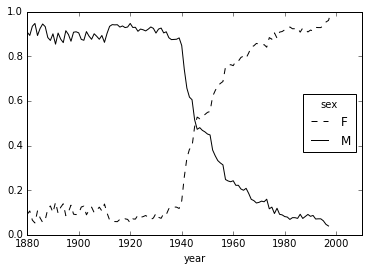

In [125]:
table.plot(style={'M':'k-','F':'k--'})

**レスリー的な名前の比率が男女で入れ替わったね